## Explanations of RPS-LJE, RPS-$l_2$, and Influence Function on CIFAR Image Classification with ResNet-20

Figure 5

In [8]:
import  numpy as np
import torch
import matplotlib.pyplot as plt


In [9]:
from models.CNN.utils_cifar import load_cifar_2
train_data, test_data = load_cifar_2(use_transform=False)

Load weight matrix and intermediate prediction of tests

In [10]:
path = '../saved_models/base'
file = np.load('{}/model/saved_outputs.npz'.format(path))
intermediate_train = torch.from_numpy(file['intermediate_train'])
intermediate_test = torch.from_numpy(file['intermediate_test'])
labels_train = file['labels_train']
labels_test = file['labels_test']

pred_train = file['pred_train'].squeeze()
pred_test = file['pred_test'].squeeze()


In [11]:
weight_matrix_rep = np.load('{}/calculated_weights/representer_weight_matrix.npz'.format(path), allow_pickle=True)['weight_matrix']
weight_matrix_influence = np.load('{}/calculated_weights/influence_weight_matrix.npz'.format(path), allow_pickle=True)['weight_matrix'].squeeze()
jaccobian_test = np.load('{}/calculated_weights/influence_weight_matrix.npz'.format(path), allow_pickle=True)['jaccobian_test']
weight_matrix_ours = np.load('{}/calculated_weights/ours_weight_matrix_with_lr_0.01.npz'.format(path), allow_pickle=True)['weight_matrix'].squeeze()

In [12]:

def get_representer_order(test_point=None):
    tmp = weight_matrix_rep[:,0] * np.dot(intermediate_train,
                                           intermediate_test[test_point,:])
    if labels_test[test_point] == 1:
        pos_idx = np.flip(np.argsort(tmp), axis=0)
        neg_idx = np.argsort(tmp)
    else:
        neg_idx = np.flip(np.argsort(tmp), axis=0)
        pos_idx = np.argsort(tmp)
    return pos_idx, neg_idx

def get_influence_order(test_point=None):
    tmp = jaccobian_test[test_point, 0]@ np.transpose(weight_matrix_influence)
    pos_idx = np.argsort(tmp, axis=0)
    neg_idx = np.flip(np.argsort(tmp, axis=0))
    return pos_idx, neg_idx

def get_ours_order(test_point=None):
    true_class = labels_test[test_point]
    tmp = np.dot(weight_matrix_ours,
                 intermediate_test[test_point,:])
    if true_class == 1:
        pos_idx = np.flip(np.argsort(tmp), axis=0)
        neg_idx = np.argsort(tmp)
    else:
        neg_idx = np.flip(np.argsort(tmp), axis=0)
        pos_idx = np.argsort(tmp)
    return pos_idx, neg_idx


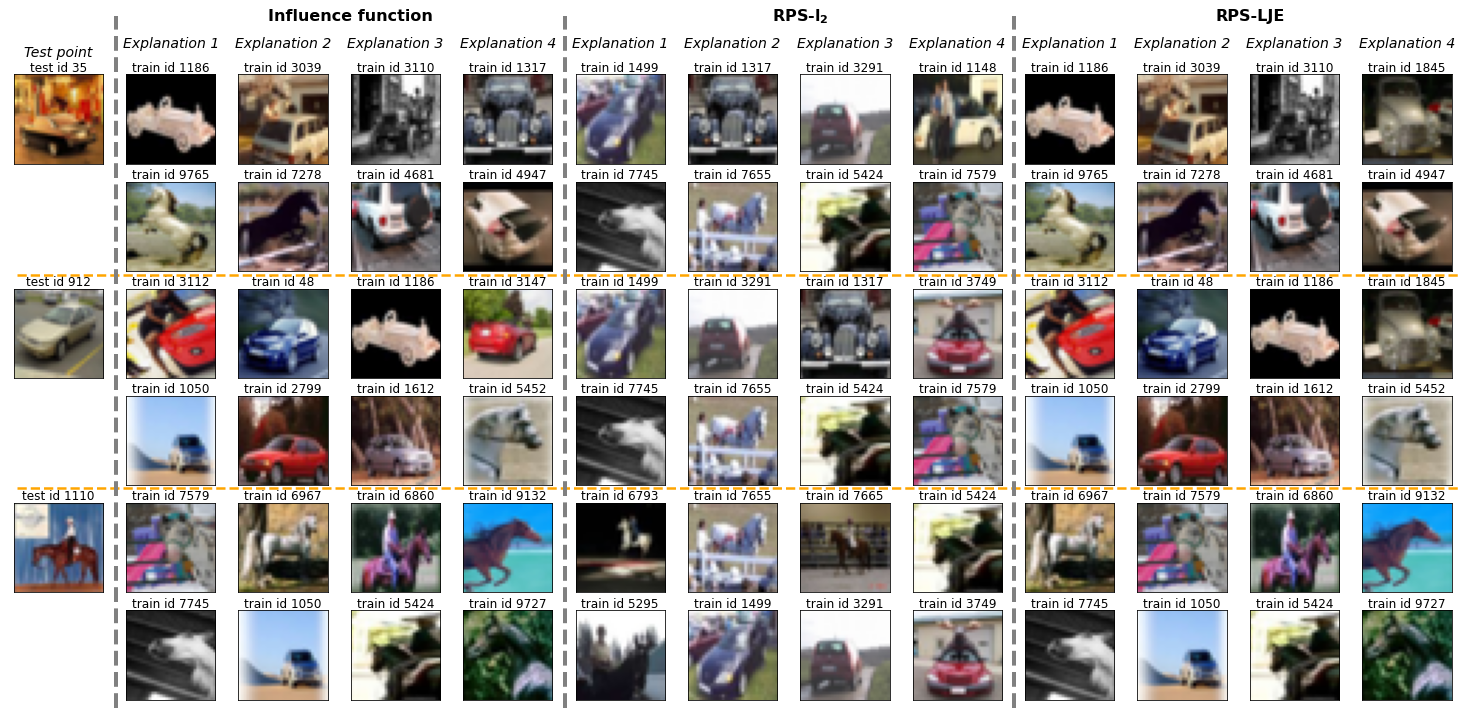

In [13]:

test_points = [35, 912, 1110]

f, ax = plt.subplots(6,13, figsize=(26,11.5))


for test_num in range(len(test_points)):
    test_point = test_points[test_num]
    true_class = int(test_data[test_point][1])
    k = 4
    image = test_data[test_point][0]

    ax[2*test_num,0].imshow(image)
    ax[2*test_num,0].set_title('test id %d' % test_point, pad=0)
    ax[2*test_num,0].set_xticks(())
    ax[2*test_num,0].set_yticks(())

    ax[2*test_num+1,0].get_xaxis().set_visible(False)
    ax[2*test_num+1,0].set_yticks(())
    ax[2*test_num+1,0].set_xticks(())
    ax[2*test_num+1,0].axis('off')

    # Influence function (first three columns)
    pos_idx, neg_idx = get_influence_order(test_point)
    for i in range(0,k):
        # Positive ones
        inf_idx = pos_idx[i]
        ax[2*test_num, i+1].imshow(train_data[inf_idx][0])
        ax[2*test_num, i+1].set_title('\ntrain id %d' % inf_idx, pad=0)
        ax[2*test_num, i+1].set_xticks(())
        ax[2*test_num, i+1].set_yticks(())

        # Negative ones
        inf_idx = neg_idx[i]
        ax[2*test_num+1, i+1].imshow(train_data[inf_idx][0])
        ax[2*test_num+1, i+1].set_title('\ntrain id %d' % inf_idx, pad=0)
        ax[2*test_num+1, i+1].set_xticks(())
        ax[2*test_num+1, i+1].set_yticks(())

    # Representer values (next three columns)
    pos_idx, neg_idx = get_representer_order(test_point)
    for i in range(k,2*k):
        # Positive ones
        rep_idx = pos_idx[i-k]
        ax[2*test_num, i+1].imshow(train_data[rep_idx][0])
        ax[2*test_num, i+1].set_title('\ntrain id %d' % rep_idx, pad=0)
        ax[2*test_num, i+1].set_xticks(())
        ax[2*test_num, i+1].set_yticks(())

        # Negative ones
        rep_idx = neg_idx[i-k]
        ax[2*test_num+1, i+1].imshow(train_data[rep_idx][0])
        ax[2*test_num+1, i+1].set_title('\ntrain id %d' % rep_idx, pad=0)
        ax[2*test_num+1, i+1].set_xticks(())
        ax[2*test_num+1, i+1].set_yticks(())

    # Ours values (last three columns)
    pos_idx, neg_idx = get_ours_order(test_point)
    for i in range(2*k,3*k):
        # Positive ones
        our_idx = pos_idx[i-2*k]
        ax[2*test_num, i+1].imshow(train_data[our_idx][0])
        ax[2*test_num, i+1].set_title('\ntrain id %d' % our_idx, pad=0)
        ax[2*test_num, i+1].set_xticks(())
        ax[2*test_num, i+1].set_yticks(())

        # Negative ones
        our_idx = neg_idx[i-2*k]
        ax[2*test_num+1, i+1].imshow(train_data[our_idx][0])
        ax[2*test_num+1, i+1].set_title('\ntrain id %d' % our_idx, pad=0)
        ax[2*test_num+1, i+1].set_xticks(())
        ax[2*test_num+1, i+1].set_yticks(())
for y in [0.638,0.38]:
    line = plt.Line2D([0.13,0.9],[y,y],
                      color="orange",linestyle='dashed',linewidth=2.5)
    f.add_artist(line)
for x in [0.183, 0.423,0.663]:
    line = plt.Line2D([x,x],[0.115,0.95],
                      color="grey",linestyle='dashed',linewidth=4)
    f.add_artist(line)
ax[0,3].text(0,1.6,'Influence function',
             transform=ax[0,3].transAxes,
             fontweight='semibold',fontsize=16,
             horizontalalignment='center')
ax[0,7].text(0,1.6,'RPS-$\\mathbf{l_2}$',
             transform=ax[0,7].transAxes,
             fontweight='semibold',fontsize=16,
             horizontalalignment='center')
ax[0,11].text(0,1.6,'RPS-LJE',
             transform=ax[0,11].transAxes,
             fontweight='semibold',fontsize=16,
             horizontalalignment='center')
explainer_idx = [4,1,2,3]
for i in range(1,k*3+1):
    ax[0,i].text(0.5,1.3,'Explanation {}'.format(explainer_idx[i%k]),
                 transform=ax[0,i].transAxes,
                 fontsize=14,fontstyle='italic',
                 horizontalalignment='center')

ax[0,0].text(0.5,1.2,'Test point',
             transform=ax[0,0].transAxes,
             fontsize=14,fontstyle='italic',
             horizontalalignment='center')
plt.subplots_adjust(wspace=0.1,hspace=0.2)
plt.savefig('img_comparison_3_methods.pdf', dpi=200, bbox_inches='tight')
plt.show()


### Additional results
Figure 8 (Appendix)

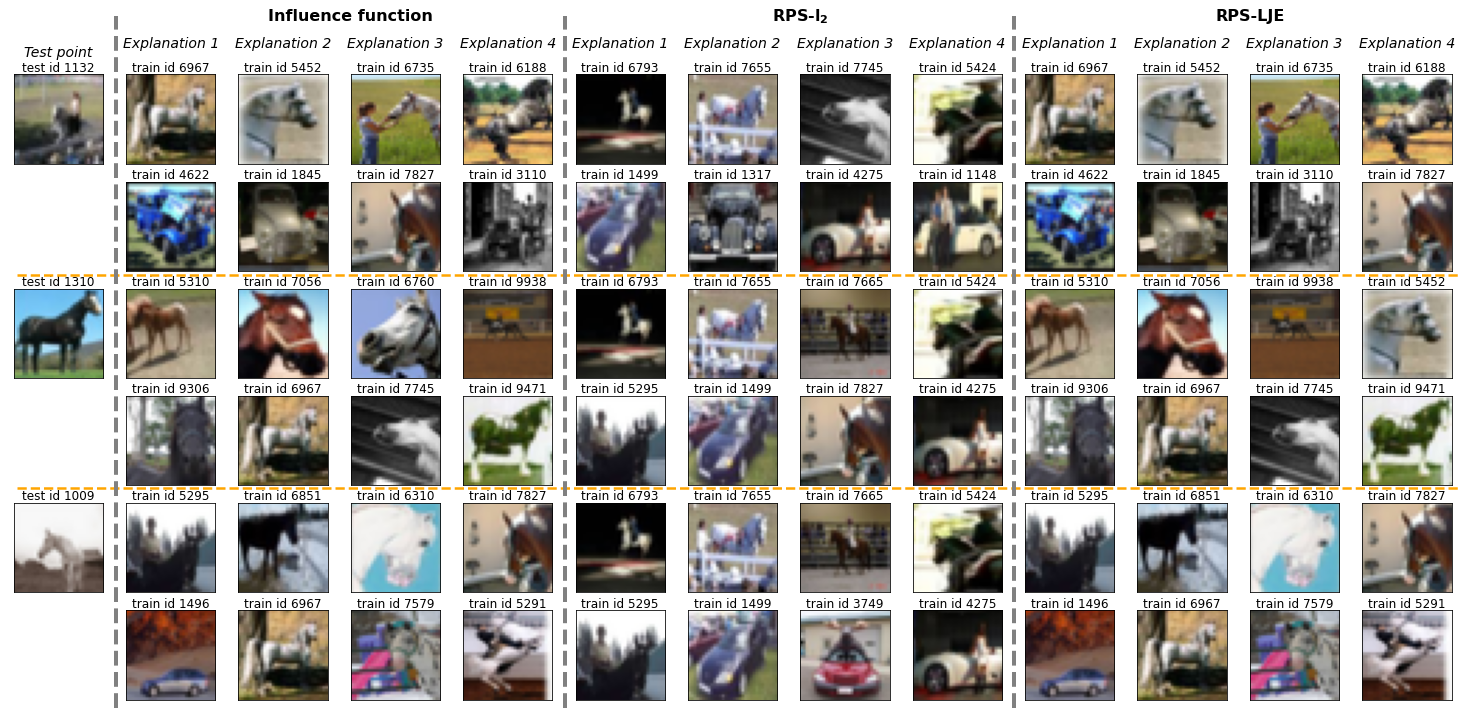

In [14]:

test_points = [1132,1310,1009]

f, ax = plt.subplots(6,13, figsize=(26,11.5))


for test_num in range(len(test_points)):
    test_point = test_points[test_num]
    true_class = int(test_data[test_point][1])
    k = 4

    image = test_data[test_point][0]

    ax[2*test_num,0].imshow(image)
    ax[2*test_num,0].set_title('test id %d' % test_point, pad=0)
    ax[2*test_num,0].set_xticks(())
    ax[2*test_num,0].set_yticks(())

    ax[2*test_num+1,0].get_xaxis().set_visible(False)
    ax[2*test_num+1,0].set_yticks(())
    ax[2*test_num+1,0].set_xticks(())
    ax[2*test_num+1,0].axis('off')

    # Influence function (first three columns)
    pos_idx, neg_idx = get_influence_order(test_point)
    for i in range(0,k):
        # Positive ones
        inf_idx = pos_idx[i]
        ax[2*test_num, i+1].imshow(train_data[inf_idx][0])
        ax[2*test_num, i+1].set_title('\ntrain id %d' % inf_idx, pad=0)
        ax[2*test_num, i+1].set_xticks(())
        ax[2*test_num, i+1].set_yticks(())

        # Negative ones
        inf_idx = neg_idx[i]
        ax[2*test_num+1, i+1].imshow(train_data[inf_idx][0])
        ax[2*test_num+1, i+1].set_title('\ntrain id %d' % inf_idx, pad=0)
        ax[2*test_num+1, i+1].set_xticks(())
        ax[2*test_num+1, i+1].set_yticks(())

    # Representer values (next three columns)
    pos_idx, neg_idx = get_representer_order(test_point)
    for i in range(k,2*k):
        # Positive ones
        rep_idx = pos_idx[i-k]
        ax[2*test_num, i+1].imshow(train_data[rep_idx][0])
        ax[2*test_num, i+1].set_title('\ntrain id %d' % rep_idx, pad=0)
        ax[2*test_num, i+1].set_xticks(())
        ax[2*test_num, i+1].set_yticks(())

        # Negative ones
        rep_idx = neg_idx[i-k]
        ax[2*test_num+1, i+1].imshow(train_data[rep_idx][0])
        ax[2*test_num+1, i+1].set_title('\ntrain id %d' % rep_idx, pad=0)
        ax[2*test_num+1, i+1].set_xticks(())
        ax[2*test_num+1, i+1].set_yticks(())



    # Ours values (last three columns)
    pos_idx, neg_idx = get_ours_order(test_point)
    for i in range(2*k,3*k):
        # Positive ones
        our_idx = pos_idx[i-2*k]
        ax[2*test_num, i+1].imshow(train_data[our_idx][0])
        ax[2*test_num, i+1].set_title('\ntrain id %d' % our_idx, pad=0)
        ax[2*test_num, i+1].set_xticks(())
        ax[2*test_num, i+1].set_yticks(())

        # Negative ones
        our_idx = neg_idx[i-2*k]
        ax[2*test_num+1, i+1].imshow(train_data[our_idx][0])
        ax[2*test_num+1, i+1].set_title('\ntrain id %d' % our_idx, pad=0)
        ax[2*test_num+1, i+1].set_xticks(())
        ax[2*test_num+1, i+1].set_yticks(())
for y in [0.638,0.38]:
    line = plt.Line2D([0.13,0.9],[y,y],
                      color="orange",linestyle='dashed',linewidth=2.5)
    f.add_artist(line)
for x in [0.183, 0.423,0.663]:
    line = plt.Line2D([x,x],[0.115,0.95],
                      color="grey",linestyle='dashed',linewidth=4)
    f.add_artist(line)
ax[0,3].text(0,1.6,'Influence function',
             transform=ax[0,3].transAxes,
             fontweight='semibold',fontsize=16,
             horizontalalignment='center')
ax[0,7].text(0,1.6,'RPS-$\\mathbf{l_2}$',
             transform=ax[0,7].transAxes,
             fontweight='semibold',fontsize=16,
             horizontalalignment='center')
ax[0,11].text(0,1.6,'RPS-LJE',
             transform=ax[0,11].transAxes,
             fontweight='semibold',fontsize=16,
             horizontalalignment='center')
explainer_idx = [4,1,2,3]
for i in range(1,k*3+1):
    ax[0,i].text(0.5,1.3,'Explanation {}'.format(explainer_idx[i%k]),
                 transform=ax[0,i].transAxes,
                 fontsize=14,fontstyle='italic',
                 horizontalalignment='center')

ax[0,0].text(0.5,1.2,'Test point',
             transform=ax[0,0].transAxes,
             fontsize=14,fontstyle='italic',
             horizontalalignment='center')
plt.subplots_adjust(wspace=0.1,hspace=0.2)
plt.savefig('img_comparison_3_methods_more.pdf', dpi=200, bbox_inches='tight')
plt.show()